<div style="text-align: center;">
  <h1>Laptop Price Prediction</h1>
  <h2>Author: Korosaki</h2>
  <h3>Date: Feb 2025</h3>
</div>

# Data Partitioning

In [1]:
import pandas as pd
import numpy as np
import joblib
import yaml
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

path = config['paths']['data']
fig_path = config['paths']['figures']
model_path = config['paths']['model']
print(path)
print(fig_path)
print(model_path)

D:/Workspace/Machine_Learning/Supervised_Learning/Regression/Laptop_Price_Prediction/data
D:/Workspace/Machine_Learning/Supervised_Learning/Regression/Laptop_Price_Prediction/figure
D:/Workspace/Machine_Learning/Supervised_Learning/Regression/Laptop_Price_Prediction/model


In [3]:
df = pd.read_csv(os.path.join(path, 'raw_data/laptop_prices.csv'))
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [4]:
y = df['Price ($)']
X = df.drop(columns=['Price ($)',])

In [5]:
cat_feat = [feature for feature in X.columns if X[feature].dtypes == 'O']
num_feat = [feature for feature in X.columns if X[feature].dtypes != 'O']

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), cat_feat),
    ('scaler', StandardScaler(), num_feat)
],  remainder='passthrough')

joblib.dump(transformer, os.path.join(model_path, 'Transformer.pkl'))

['D:/Workspace/Machine_Learning/Supervised_Learning/Regression/Laptop_Price_Prediction/model\\Transformer.pkl']

In [8]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.fit_transform(X_test)

# Model Trainning

In [9]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_transformed, y_train)

SVR()

In [10]:
svr.score(X_train_transformed, y_train)

0.08825115181934129

In [11]:
svr.score(X_test_transformed, y_test)

0.07511163105533936

Poor Performance

# Model Optimization

In [12]:
def param_tuning (X, y):
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 0.2],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Create the model
    svr = SVR()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
    grid_search.fit(X, y)

    # Best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    return best_params, best_model

In [14]:
param, model = param_tuning(X_train_transformed, y_train)
print(param)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   3.6s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   3.3s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   3.4s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   3.8s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   3.4s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   3.3s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   3.3s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   3.1s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   3.1s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   3.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   3.2s
[CV] END .......C=0.1, epsilon=0.01, gamma=scal

In [15]:
scores = cross_val_score(model, X_train_transformed, y_train, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", np.mean(scores))

Cross-validation scores:  [0.90394394 0.89931959 0.91776223 0.91179392 0.91463893]
Mean cross-validation score:  0.9094917187102759


In [16]:
model.score(X_train_transformed, y_train)

0.9353300235156576

In [17]:
model.score(X_test_transformed, y_test)

0.9103656655697225

# Model Evaluation

In [18]:
y_pred = model.predict(X_test_transformed)
y_pred

array([1435.55499815, 1542.33656454, 2249.72937979, ..., 1807.29291227,
       1513.3601086 , 1942.03593946])

In [19]:
from sklearn.metrics import root_mean_squared_error, r2_score

RMSE = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
R2 = r2_score(y_true=y_test, y_pred=y_pred)

In [20]:
print(f'RMSE:{RMSE}')
print(f'R2_SCORE:{R2}')

RMSE:398.5461232870261
R2_SCORE:0.9103656655697225


# Result Visualization

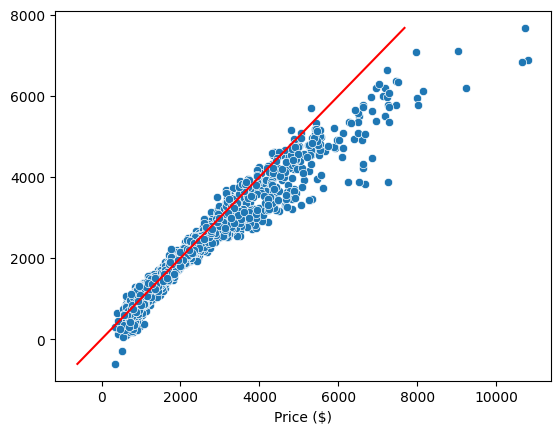

In [22]:
sns.scatterplot(x=y_test, y=y_pred)
sorted_indices = np.argsort(y_pred)
plt.plot(y_pred[sorted_indices], model.predict(X_test_transformed)[sorted_indices], color='red')
plt.show()

Well-fitted

In [28]:
joblib.dump(model, os.path.join(model_path, 'laptop_price_prediction.pkl'))

['D:/Workspace/Machine_Learning/Supervised_Learning/Regression/Laptop_Price_Prediction/model\\laptop_price_prediction.pkl']